In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


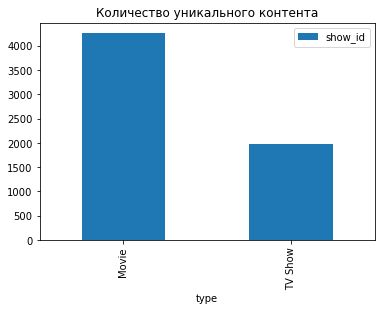

In [4]:
df_type = df[['show_id', 'type']].groupby('type').count()
df_type.plot(kind='bar', 
             title='Количество уникального контента')

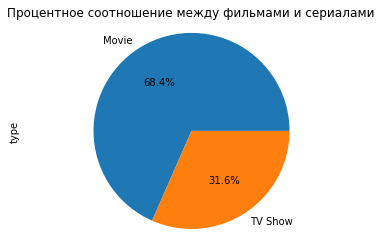

In [5]:
df.type.value_counts(sort=False).plot.pie(autopct='%1.1f%%') #в этом случае можно ее применить
plt.axis('equal')
plt.title('Процентное соотношение между фильмами и сериалами')
plt.show()

* На основе данных на 2019 год на сервисе преобладают фильмы

<ipython-input-6-cad40125bd99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_subset['Duration_mins'] =movie_subset['duration'].str.rstrip('min').astype('int') #приведение длительности к числам


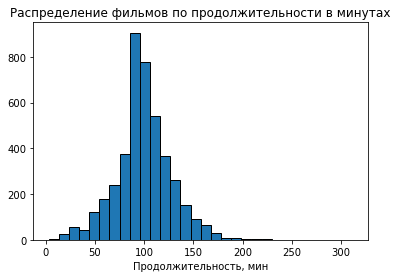

In [6]:
subset = pd.DataFrame(df, columns = ['show_id','title','type','rating', 'duration'])
movie_subset = subset[subset['type'] == "Movie"] #выборка по фильмам

movie_subset['Duration_mins'] =movie_subset['duration'].str.rstrip('min').astype('int') #приведение длительности к числам

movie_subset.hist(column='Duration_mins', bins=30, grid=False, edgecolor="black")
plt.title("Распределение фильмов по продолжительности в минутах")
plt.xlabel('Продолжительность, мин')
plt.show()

* По этим данным наибольшее количество фильмов на сервисе имеют длительность 85-110 минут, фильмов с длительностью менее 70 минут и более 130 минут менее представлены

In [7]:
tv_subset = subset[subset['type'] == "TV Show"]

#таблица длительности сериала в сезонах - кол-во рейтингов
tv_pivot = pd.pivot_table(tv_subset, index=['duration'], columns= ['rating'], aggfunc='count',fill_value =0)

#приведение сводной таблицы к df 
tv_cols = list(tv_pivot.columns.get_level_values(level=1))
tv_index = list(tv_pivot.index.get_level_values(level=0))
tv_output = pd.DataFrame(tv_pivot.values, index=tv_index, columns=tv_cols)

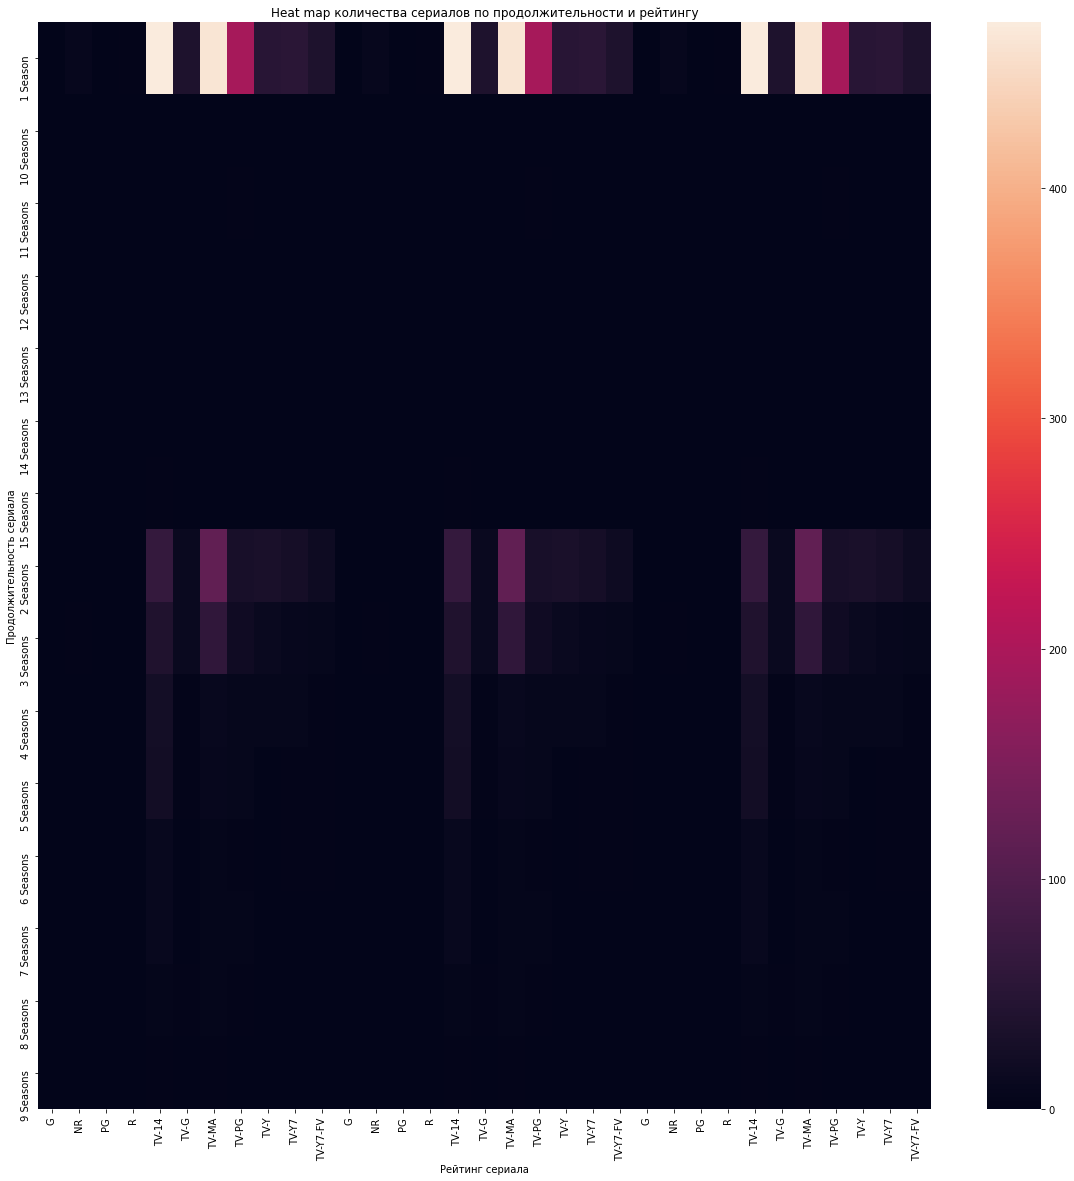

In [8]:
plt.figure(figsize = (20,20))
sns.heatmap(tv_output)
plt.ylabel('Продолжительность сериала')
plt.xlabel('Рейтинг сериала')
plt.title('Heat map количества сериалов по продолжительности и рейтингу')
plt.show() #рейтинги продублировались 

* Наибольшее количество сериалов имеет продолжительность в 1 сезон и рейтинг TV-14 (для старше 14 лет) и TV-MA (старше 17 лет), сериалов с длительностью больше трех сезонов практически нет (больше 8 сезонов нет проектов)

Топ 10 стран, производящих контент

In [10]:
count_countries = df['country'].value_counts().sort_values(ascending=False)
count_countries = pd.DataFrame(count_countries)
top10 = count_countries[0:10]
top10.style.bar(align='mid') #можно было бы еще одну столбчатую диаграмму сделать

,country
United States,2032
India,777
United Kingdom,348
Japan,176
Canada,141
South Korea,136
Spain,117
France,90
Mexico,83
Turkey,79


Text(0.5, 1.0, 'Распределение контента на сервисе по годам выхода')

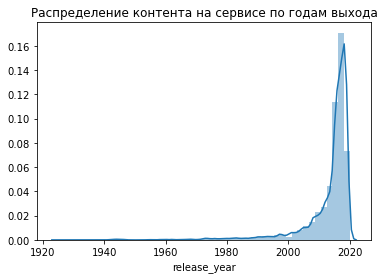

In [15]:
ax = sns.distplot(df.release_year)
ax.set_title('Распределение контента на сервисе по годам выхода')

* На сервисе наибольшее количество фильмов и сериалов, выходивших в период 2000-2020 (данные на 2019 год), пик на графике - 2018 год